In [1]:
import pandas as pd
import pickle 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir("../results_v1"))

['results_shadr_token512_epoch5_batch32', 'results_medqa_token512_epoch5_batch32', 'results_bbq_token512_epoch-5_batch-32', 'results_cxr-report-multiclass_token512_epoch2_batch32']


In [3]:
import pickle
import pandas as pd

strong_results_dir = '../results_v1/results_cxr-report-multiclass_token512_epoch2_batch32/strong_model_gt/EleutherAI_pythia-160m/step121000/results.pkl'
weak_results_dir = '../results_v1/results_cxr-report-multiclass_token512_epoch2_batch32/weak_model_gt/EleutherAI_pythia-70m/step121000/results.pkl'
strong_transfer_dir = '../results_v1/results_cxr-report-multiclass_token512_epoch2_batch32/strong_model_transfer/EleutherAI_pythia-70m_step121000_EleutherAI_pythia-160m_step121000_xent/results.pkl'

# Read the results pickle files
with open(strong_results_dir, 'rb') as f:
    strong = pickle.load(f)

# Read the results pickle files
with open(weak_results_dir, 'rb') as f:
    weak = pickle.load(f)

with open(strong_transfer_dir, 'rb') as f:
    strong_transfer = pickle.load(f)


In [4]:
strong_df = pd.DataFrame(strong['test_results'])
weak_df = pd.DataFrame(weak['test_results'])
strong_transfer_df = pd.DataFrame(strong_transfer['test_results'])
results_df = pd.concat([strong_df, weak_df, strong_transfer_df], axis=0, keys=['strong', 'weak', 'strong_transfer']).reset_index(level=0)
results_df = results_df.rename(columns={'level_0': 'model'})
results_df

,model,txt,input_ids,gt_label,pred_hard_label,acc,logits,soft_label
0,strong,Report: Moderate pulmonary edema.\n\nAnswer: E...,"[20684, 27, 4559, 5034, 12698, 30297, 15, 187,...",1,1,True,"[-3.35337233543396, 3.353374481201172]","[0.0012211417779326439, 0.9987788796424866]"
1,strong,Report: As compared to the previous radiograph...,"[20684, 27, 1284, 2429, 281, 253, 2045, 8188, ...",1,1,True,"[-2.974822759628296, 2.974825382232666]","[0.0025999806821346283, 0.9974000453948975]"
2,strong,Report: Tip is unchanged in position in the mi...,"[20684, 27, 38708, 310, 19965, 275, 1899, 275,...",1,1,True,"[-3.116469621658325, 3.116472005844116]","[0.0019598188810050488, 0.9980402588844299]"
3,strong,Report: No acute intrathoracic abnormalities i...,"[20684, 27, 1621, 7928, 4996, 506, 263, 23220,...",0,0,True,"[3.2491960525512695, -3.2492003440856934]","[0.998496413230896, 0.0015035878168419003]"
4,strong,Report: PA and lateral chest compared to ___:\...,"[20684, 27, 8010, 285, 11884, 9081, 2429, 281,...",1,1,True,"[-2.389352321624756, 2.3893539905548096]","[0.008336778730154037, 0.9916632175445557]"
...,...,...,...,...,...,...,...,...
10211,strong_transfer,Report: 1. Resolution of pulmonary edema.\n 2...,"[20684, 27, 337, 15, 50276, 2632, 2241, 273, 1...",1,1,True,"[-2.5582284927368164, 2.5582327842712402]","[0.005961455870419741, 0.9940385818481445]"
10212,strong_transfer,Report: In comparison with the earlier study o...,"[20684, 27, 496, 5301, 342, 253, 4321, 1263, 2...",0,0,True,"[2.321951150894165, -2.3219552040100098]","[0.990471601486206, 0.009528378956019878]"
10213,strong_transfer,Report: New left lower lobe collapse.\n \n Res...,"[20684, 27, 1457, 1669, 2406, 27317, 13551, 15...",0,0,True,"[2.955886125564575, -2.9558916091918945]","[0.9972999691963196, 0.0027000601403415203]"
10214,strong_transfer,Report: Multiple old left-sided rib fractures ...,"[20684, 27, 20815, 1711, 1669, 14, 21773, 9412...",1,1,True,"[-2.7440080642700195, 2.7440123558044434]","[0.004118987359106541, 0.9958810806274414]"


In [5]:
results_df.iloc[2,1]

'Report: Tip is unchanged in position in the mid SVC.  Probable developing pseudotumor\n in the right side.  Stable background pulmonary edema.\n\nAnswer: Edema'

In [6]:
pd.read_csv('../data/report_multiclass_v2.csv')

,subject_id,study_id,report,report_small,label,distraction1,distraction2,hard_label,train,question,gender,anchor_age,ethnicity,report_small1,report_small_dem,gender_inj,anchor_age_inj,ethnicity_inj,report_small_dem_xtreme
0,11006601,54944113,FINAL REPORT\...,Chronic borderline cardiomegaly.,Cardiomegaly,Pleural Effusion,Pneumonia,0,1,"Based on the report, which condition does this...",Female,51.0,Black,IMPRESSION: Chronic borderline cardiomegaly.\n...,Patient is a 51.0 year old Black Female. IMPRE...,Female,51.0,Black,Patient is a 51.0 year old Black Female. IMPRE...
1,12532271,50115109,FINAL REPORT\...,Cardiomegaly. No evidence of acute disease.,Cardiomegaly,Pleural Effusion,Fracture,1,1,"Based on the report, which condition does this...",Male,58.0,Black,IMPRESSION: Cardiomegaly. No evidence of acute...,Patient is a 58.0 year old Black Male. IMPRESS...,Male,58.0,Black,Patient is a 58.0 year old Black Male. IMPRESS...
2,19969991,59236640,FINAL REPORT\...,"Heart size is enlarged, unchanged. Mediastinum...",Cardiomegaly,Pneumonia,Pleural Effusion,1,1,"Based on the report, which condition does this...",Female,62.0,White,"IMPRESSION: Heart size is enlarged, unchanged....",Patient is a 62.0 year old White Female. IMPRE...,Female,62.0,Black,Patient is a 62.0 year old Black Female. IMPRE...
3,17380967,55353869,FINAL REPORT\...,Enlarged cardiac silhouette somewhat globular ...,Cardiomegaly,Fracture,Lung Opacity,0,1,"Based on the report, which condition does this...",Male,53.0,Black,IMPRESSION: Enlarged cardiac silhouette somewh...,Patient is a 53.0 year old Black Male. IMPRESS...,Male,53.0,Black,Patient is a 53.0 year old Black Male. IMPRESS...
4,13674030,57778304,FINAL REPORT\...,"Compared to chest radiographs since ___, most ...",Cardiomegaly,Support Devices,Fracture,1,1,"Based on the report, which condition does this...",Female,78.0,Black,IMPRESSION: Compared to chest radiographs sinc...,Patient is a 78.0 year old Black Female. IMPRE...,Female,78.0,Black,Patient is a 78.0 year old Black Female. IMPRE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51071,16716611,52045964,FINAL REPORT\...,No acute cardiopulmonary process.,None of the Above,Edema,Atelectasis,0,0,"Based on the report, which condition does this...",Male,63.0,White,IMPRESSION: No acute cardiopulmonary process.\...,Patient is a 63.0 year old White Male. IMPRESS...,Male,63.0,White,Patient is a 63.0 year old White Male. IMPRESS...
51072,18044380,53283137,FINAL REPORT\...,No acute cardiopulmonary process.,None of the Above,Edema,Support Devices,0,0,"Based on the report, which condition does this...",Female,46.0,Black,IMPRESSION: No acute cardiopulmonary process.\...,Patient is a 46.0 year old Black Female. IMPRE...,Female,46.0,Black,Patient is a 46.0 year old Black Female. IMPRE...
51073,19266021,57320477,FINAL REPORT\...,No acute cardiopulmonary process.,None of the Above,Lung Opacity,Enlarged Cardiomediastinum,0,0,"Based on the report, which condition does this...",Male,45.0,Unknown,IMPRESSION: No acute cardiopulmonary process.\...,Patient is a 45.0 year old Male whose ethnicit...,Male,45.0,Unknown,Patient is a 45.0 year old Male whose ethnicit...
51074,16716950,59845826,FINAL REPORT\...,Large mass at the thoracic inlet extending inf...,None of the Above,Cardiomegaly,Pleural Effusion,0,0,"Based on the report, which condition does this...",Male,73.0,White,IMPRESSION: Large mass at the thoracic inlet e...,Patient is a 73.0 year old White Male. IMPRESS...,Male,73.0,White,Patient is a 73.0 year old White Male. IMPRESS...


## Accuracy comparison between models

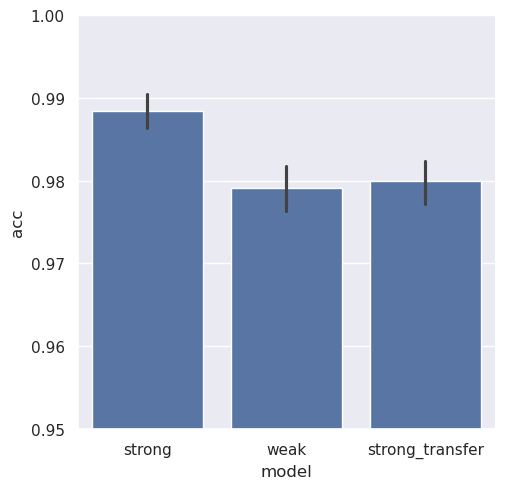

,model,acc
0,strong,0.988449
1,strong_transfer,0.979933
2,weak,0.979052


In [7]:
sns.set_theme()
p = sns.catplot(data=results_df, kind="bar", x="model", y="acc")
p.set(ylim=(0.95, 1)) 
plt.show()

results_df.groupby('model')['acc'].mean().reset_index()

## ROC

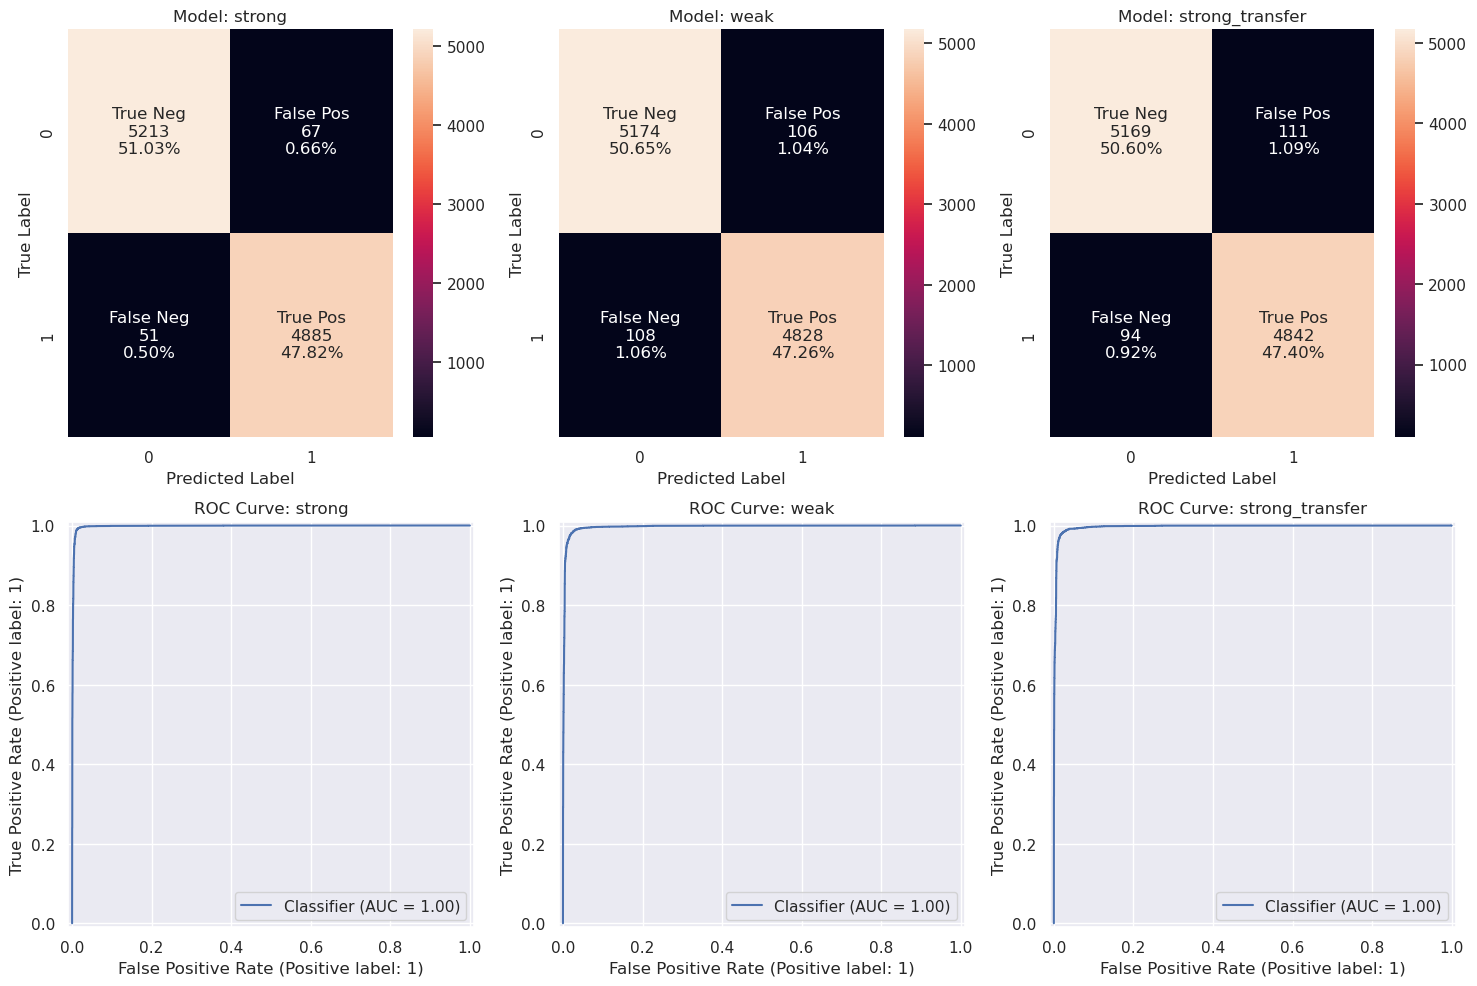

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

models = ['strong', 'weak', 'strong_transfer']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjusted figsize for clearer visibility

for idx, model in enumerate(models):
    df_filtered = results_df[results_df['model'] == model]
    y_test = df_filtered['gt_label'].tolist()
    y_pred = df_filtered['pred_hard_label'].tolist()
    y_prob = df_filtered['soft_label'].apply(lambda x: x[1]).tolist()
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', ax=axes[0, idx])
    axes[0, idx].set_title(f'Model: {model}')
    axes[0, idx].set_xlabel('Predicted Label')
    axes[0, idx].set_ylabel('True Label')

    RocCurveDisplay.from_predictions(y_test, y_prob, ax=axes[1, idx])
    axes[1, idx].set_title(f'ROC Curve: {model}')

plt.tight_layout()
plt.show()

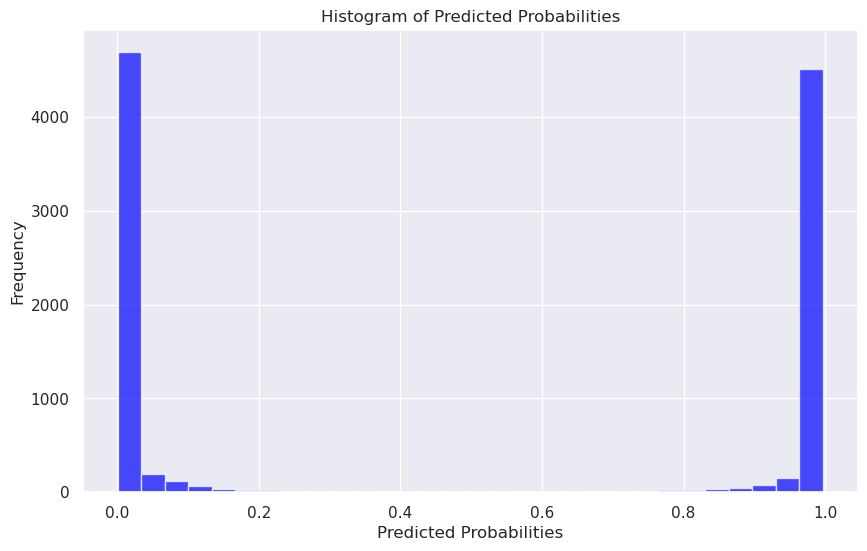

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=30, color='blue', alpha=0.7)  # bins parameter defines the number of intervals or "bins"
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.grid(True)
plt.show()

## 